<h1>AUTONOMIO | Hyperparameter Search</h1>
<img src='http://autonom.io/wp-content/uploads/2017/08/autonomio_logo.png' style="display: inline; horizontal-align: left; clear: both;">
<p>1st of September, 2017</p><br>
<a href='https://github.com/autonomio/core-module/blob/dev/notebooks/autonomio_data_preparation.ipynb'>DOWNLOAD THIS NOTEBOOK</a>

<h2>Installing Autonomio</h2><br>

<code>pip install git+https://github.com/autonomio/core-module.git</code>

<h2>Hyperscan | Headache Free Parameter Tuning</h2>

In this notebook we will review the hyperscan command which is grid search of the key paramater space. Hyperscan solves the problem of spending hours or days looking for the best parameters for a given task, and streamlines it to a single command. 

Autonomio provides three key capabilities to this end: 

1) intuitive configuration of searches

2) analysis of the results

3) integrated plotting

## Performing a Hyperparameter Search - Testing One Parameter

In this example we will look for parameters for two popular machine learning datasets 1) Titanic and 2) Pima Indian Diabetes. In this first example we are already assusming that certain parameters are clear, and we just want to try the difference between three different activations. We'll do something more involving in the next step. 

In [32]:
# let's first take care of the imports
from autonomio.commands import data, hyperscan

# load the data from disk
diabetes = data('diabetes.csv','file',header=None)

# start the hyperparameter scan
result = hyperscan([0,8], 
                   'i', 
                   diabetes,
                   epochs=250,
                   dropout=0,
                   scan_mode='selective', 
                   losses='logcosh',
                   shapes='brick', 
                   optimizers='nadam',
                   activations=['softsign','elu','relu'],
                   layers=4,
                   batch_sizes=12)

Total tries in this scan: 3
Scan started on: 03:36
Estimated finish: 03:37


Actually the hyperscan command behaves almost exactly like the train command does, but with the difference that it tries out more than one option. Also the output is completely different. 

### Descrpitive Analysis of the Results

In [33]:
from autonomio.hyperstats import hyper_descriptive

# let's start with something simple
hyper_descriptive(result,'activation','test_acc_max')

,test_acc_max
activation,
elu,0.775591
relu,0.736220
softsign,0.732283


As it become apparent, *relu* is outperforming the three other activation options in our scan. Let's see if the accuracy is just that, or if we have a nice loss values as well.

In [16]:
# let's start with something simple
hyper_descriptive(result,'activation','test_loss_max')

,test_loss_max
activation,
relu,0.116243
elu,0.114573
softsign,0.107656


The loss seems more or less acceptable as well. Given that our test accuracy is roughly 80% (acceptable result for this challenge), we're off to a good start.

### Descriptive Analysis Metrics

There are alltogether 20 metrics we get as a result of a hyperscan. All metrics are calculated from the last 10 epochs, except those marked with (\*).

- train_acc
- train_acc_mean
- train_acc_min\*
- train_acc_max\*
- train_acc_std
- train_loss
- train_loss_mean
- train_loss_min\*
- train_loss_max\*
- train_loss_std
- test_acc
- test_acc_mean
- test_acc_min\*
- test_acc_max\*
- test_acc_std
- test_loss
- test_loss_mean
- test_loss_min\*
- test_loss_max\*
- test_loss_std

## Performing a Hyperparameter Search - Testing Multiple Parameters

In most cases, coming to a new dataset, we don't have a clear picture of which settings we should start with and typically will want to test at least few diferent parameters at one go. 

In [42]:
# let's first take care of the imports
from autonomio.commands import hyperscan

# load the data from disk
diabetes = data('diabetes.csv','file',header=None)

# start the hyperparameter scan
result_2nd = hyperscan([0,8], 
                       'i', 
                       diabetes,
                       epochs=250,
                       scan_mode='selective', 
                       losses=['logcosh'],
                       shapes=['brick','diamond'], 
                       optimizers=['rmsprop','adam','nadam'],
                       activations=['elu'],
                       layers=[2,6],
                       batch_sizes=[10,16,2])

Total tries in this scan: 144
Scan started on: 07:01
Estimated finish: 07:21


As we start to perform wider scans, we obviously also have to wait a longer time for the results. An estimated finish time is provided as a rough approximation based on how long the first scan takes to perform.

There are several ways you can input data in to hyperscan:

- Input a single value (string or int)
- Input a list of items (string values)
- Input a range (two ints) 
- Input a range with steps (three ints)


In [44]:
# let's see now if we found a better configuration with this scan
hyper_descriptive(result_2nd,'loss','test_acc_max')

,test_acc_max
loss,
logcosh,0.755906


## Performing a Hyperparameter Search - An Extensive Scan

In [ ]:
# start an extensive hyperparameter scan
result_3rd = hyperscan([0,8], 
                       'i', 
                       diabetes,
                       epochs=250,
                       dropout=0,
                       scan_mode='selective', 
                       losses=['logcosh'],
                       shapes='auto', 
                       optimizers=['rmsprop','adam','nadam'],
                       activations=['softsign','elu','relu'],
                       layers=[4,10],
                       batch_sizes=[7,25])

Total tries in this scan: 7,776<br>
Scan started on: 03:36<br>
Estimated finish: 11:52<br>

In [67]:
hyper_descriptive(result_3rd,['shape','optimizer','activation'],'test_acc_max','max').head(10)

test_acc_max
shape       optimizer activation              
brick       nadam     relu            0.842520
            rmsprop   relu            0.834646
            adam      elu             0.834646
rhombus     nadam     elu             0.830709
triangle    nadam     elu             0.830709
rhombus     rmsprop   elu             0.826772
stairs      nadam     relu            0.826772
            rmsprop   elu             0.822835
long_funnel adam      elu             0.822835
diamond     nadam     relu            0.822835

In addition to scanning through wider range of parameters, we're also using 'auto' as an option in scan, which means that all available parameter values for that parameter are going to be included in the scan. This scan yields 7,776 unique combinations, and takes more than half a day to complete on a regular machine. So we'll leave it for now, and move on to one more set of examples, visualizing the results of hyperscan.

## Visualizing the Results of Hyperscan

There are in total four different plots you can use for visualizing the hyperscan results. 

- duaparam
- paramagg
- paramscatter
- quadparam

<h3>An aggregate of all parameters against loss and accuracy</h3>

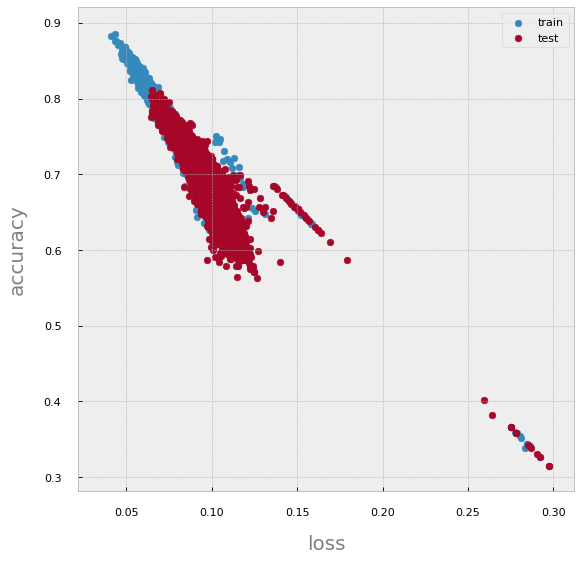

In [73]:
from autonomio.plots.paramagg import paramagg

paramagg(result_3rd)

### Comparison of two different values in a given parameter

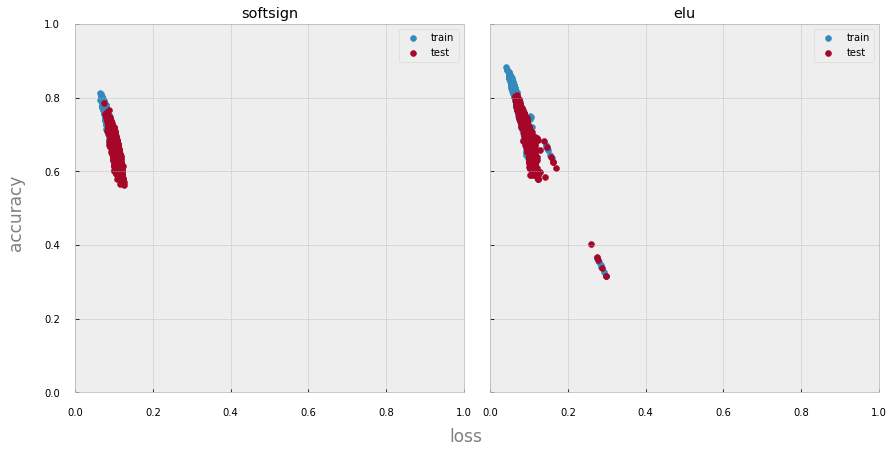

In [71]:
from autonomio.plots.duaparam import duaparam

duaparam(result_3rd,'activation','softsign','elu')

### Grid with all the values for a given parameter

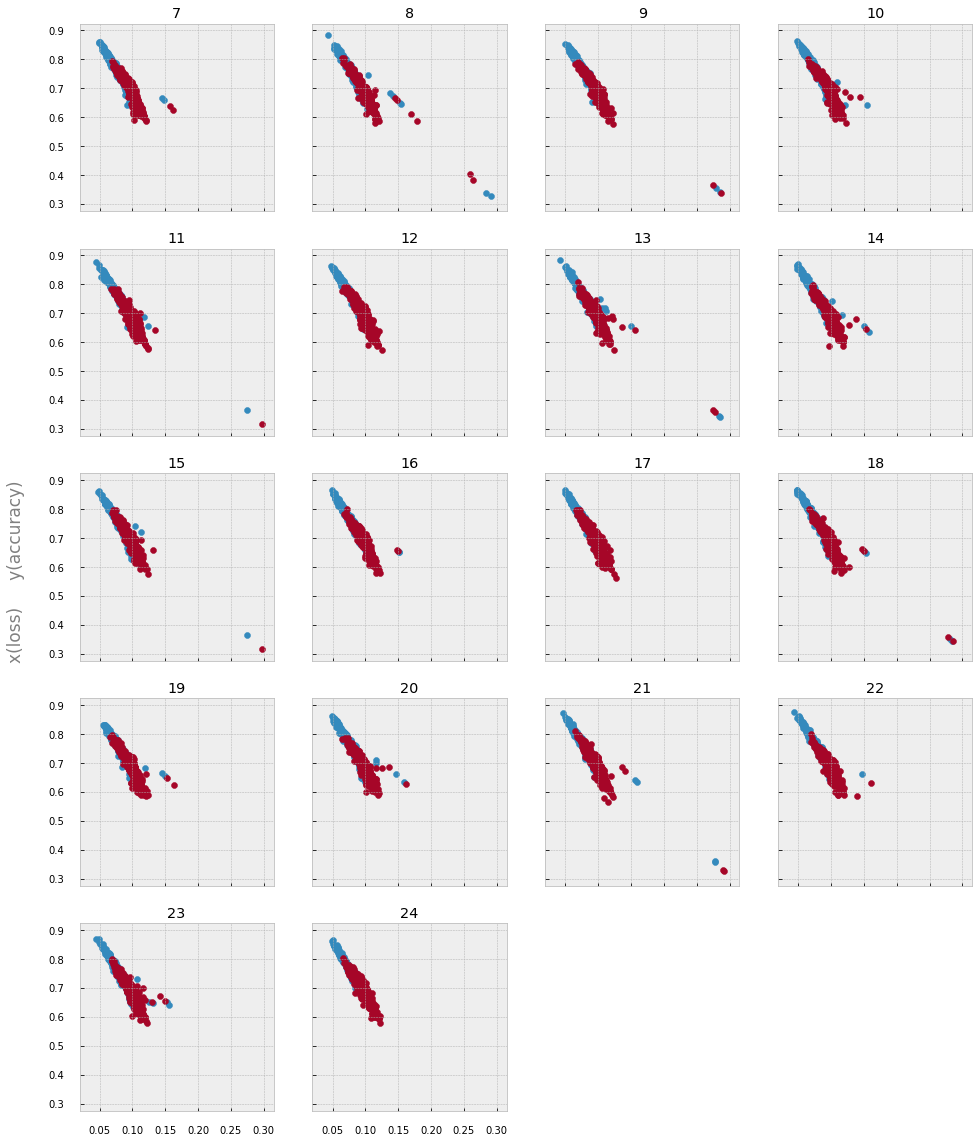

In [78]:
from autonomio.plots.paramgrid import paramgrid

paramgrid(result_3rd,'batch_size')

### Visualizing any four dimensions simultanously  (metric or parameter)

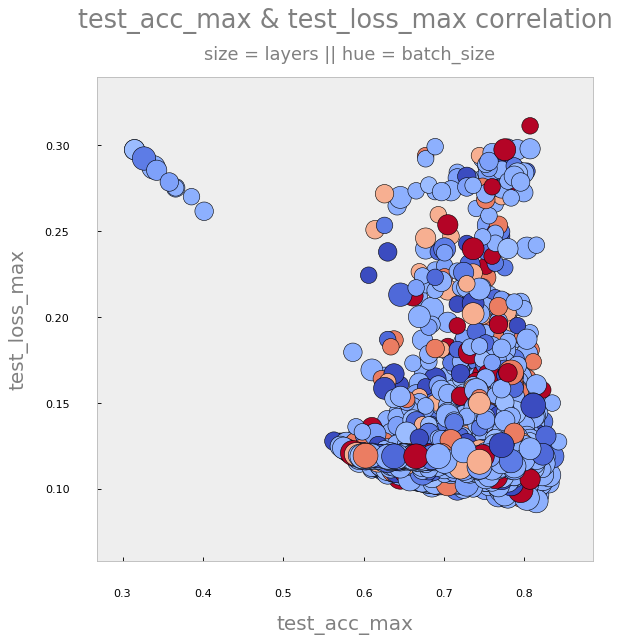

In [84]:
from autonomio.plots.quadparam import quadparam

quadparam(result_3rd,'test_acc_max','test_loss_max','layers','batch_size')

That's it for now. Go ahead and try what Autonomio can do with your own data...and have fun! :)

<h2>Installing Autonomio</h2><br>

<code>pip install git+https://github.com/autonomio/core-module.git</code>

<img src='https://img09.deviantart.net/0248/i/2013/295/d/8/that_s_all_folks__by_surrimugge-d6rfav1.png'><br>

<a href='http://autonom.io'>Autonomio Website</a><br>

<a href='https://github.com/autonomio/core-module'>On Github</a><br>

<img src='http://autonom.io/wp-content/uploads/2017/08/autonomio_logo.png' style="display: inline; horizontal-align: left; clear: both;">